<b>1</b> OBTENCIÓN DE DATOS

15
Muestras Ramas 33.000000
Muestras Nodos 56.000000
nodosPorRama 13.575758
cafesPorNodo 9.000000
#################################footer
Muestras Ramas 21.000000
Muestras Nodos 55.000000
nodosPorRama 20.380952
cafesPorNodo 8.890909
Total 14473.475325
VolumenImage : 2.963 
VolumenCalc : 3.150 
99
Muestras Ramas 35.000000
Muestras Nodos 57.000000
nodosPorRama 15.000000
cafesPorNodo 8.000000
#################################footer
Muestras Ramas 30.000000
Muestras Nodos 56.000000
nodosPorRama 15.200000
cafesPorNodo 8.803571
Total 17093.600000
VolumenImage : 2.255 
VolumenCalc : 2.574 
22
Muestras Ramas 28.000000
Muestras Nodos 57.000000
nodosPorRama 20.142857
cafesPorNodo 7.192982
#################################footer
Muestras Ramas 26.000000
Muestras Nodos 55.000000
nodosPorRama 16.538462
cafesPorNodo 7.254545
Total 12788.304064
VolumenImage : 2.666 
VolumenCalc : 2.962 
62
Muestras Ramas 18.000000
Muestras Nodos 49.000000
nodosPorRama 11.666667
cafesPorNodo 6.795918
#################

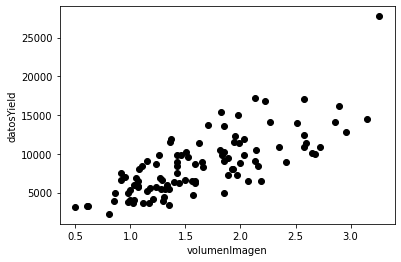

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> pre PROCESAMIENTO DE DATA

In [2]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data)

15
Muestras Ramas 33.000000
Muestras Nodos 56.000000
nodosPorRama 13.575758
cafesPorNodo 9.000000
#################################footer
Muestras Ramas 21.000000
Muestras Nodos 55.000000
nodosPorRama 20.380952
cafesPorNodo 8.890909
Total 14473.475325
VolumenImage : 2.963 
VolumenCalc : 3.150 
99
Muestras Ramas 35.000000
Muestras Nodos 57.000000
nodosPorRama 15.000000
cafesPorNodo 8.000000
#################################footer
Muestras Ramas 30.000000
Muestras Nodos 56.000000
nodosPorRama 15.200000
cafesPorNodo 8.803571
Total 17093.600000
VolumenImage : 2.255 
VolumenCalc : 2.574 
22
Muestras Ramas 28.000000
Muestras Nodos 57.000000
nodosPorRama 20.142857
cafesPorNodo 7.192982
#################################footer
Muestras Ramas 26.000000
Muestras Nodos 55.000000
nodosPorRama 16.538462
cafesPorNodo 7.254545
Total 12788.304064
VolumenImage : 2.666 
VolumenCalc : 2.962 
62
Muestras Ramas 18.000000
Muestras Nodos 49.000000
nodosPorRama 11.666667
cafesPorNodo 6.795918
#################

3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

In [3]:
print(len(datos.datosYeld))
dataframe.corr(method="pearson")

103


,yields,ndvi,volumenImagen,volumenCalculado,areaCalculada,areaImagen,alturaImagen,alturaMedida,datosIafNdvi,meanRed,...,varianceRed,varianceGreen,varianceBlue,ndviMean,ndviMax,ndviMin,rviMean,nrviMean,tviMean,saviMean
yields,1.000000,0.101661,0.760897,0.754905,0.610232,0.632154,0.719736,0.730056,0.202594,0.205073,...,0.297754,0.011392,0.454845,0.101661,0.594870,-0.300613,0.108473,0.101661,0.100966,0.102918
ndvi,0.101661,1.000000,-0.238039,-0.159239,-0.082200,-0.172962,-0.284269,-0.079980,-0.072935,0.258659,...,-0.115020,-0.323256,-0.191047,1.000000,0.268375,0.363234,0.998785,1.000000,0.999979,0.999954
volumenImagen,0.760897,-0.238039,1.000000,0.948400,0.787971,0.925925,0.832837,0.709445,0.235857,0.149971,...,0.251327,0.053490,0.460216,-0.238039,0.406683,-0.407018,-0.235486,-0.238039,-0.238267,-0.236259
volumenCalculado,0.754905,-0.159239,0.948400,1.000000,0.827770,0.938198,0.715321,0.810952,0.155685,0.244302,...,0.209929,-0.061652,0.422185,-0.159239,0.410319,-0.303929,-0.162137,-0.159239,-0.158755,-0.156663
areaCalculada,0.610232,-0.082200,0.787971,0.827770,1.000000,0.801173,0.581702,0.653904,0.179808,0.195956,...,0.123808,-0.060139,0.343122,-0.082200,0.318814,-0.276201,-0.081652,-0.082200,-0.082314,-0.080208
areaImagen,0.632154,-0.172962,0.925925,0.938198,0.801173,1.000000,0.582783,0.574280,0.082127,0.231001,...,0.111674,-0.108834,0.304249,-0.172962,0.343554,-0.223763,-0.175572,-0.172962,-0.172616,-0.170245
alturaImagen,0.719736,-0.284269,0.832837,0.715321,0.581702,0.582783,1.000000,0.754090,0.402498,-0.005457,...,0.368887,0.256154,0.562349,-0.284269,0.323579,-0.559630,-0.274855,-0.284269,-0.285262,-0.284235
alturaMedida,0.730056,-0.079980,0.709445,0.810952,0.653904,0.574280,0.754090,1.000000,0.247509,0.196025,...,0.274802,-0.003062,0.490301,-0.079980,0.338718,-0.342368,-0.081775,-0.079980,-0.079520,-0.078324
datosIafNdvi,0.202594,-0.072935,0.235857,0.155685,0.179808,0.082127,0.402498,0.247509,1.000000,-0.225125,...,0.421174,0.465448,0.530035,-0.072935,-0.024792,-0.919003,-0.057017,-0.072935,-0.074907,-0.075789
meanRed,0.205073,0.258659,0.149971,0.244302,0.195956,0.231001,-0.005457,0.196025,-0.225125,1.000000,...,0.209767,-0.525296,0.178874,0.258659,0.210205,0.230929,0.241073,0.258659,0.260858,0.267729


GRAFICAS ENTRE VARIABLES

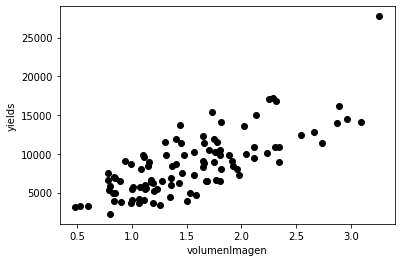

In [4]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataframe["volumenImagen"],dataframe["yields"],c="black")
pyplot.xlabel("volumenImagen")
pyplot.ylabel("yields")

pyplot.show()

SE CALCULA LA VARIABLE EL IAF
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

Diametro

$diameter = 2*\sqrt(\frac{area}{\pi})$

In [5]:

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)


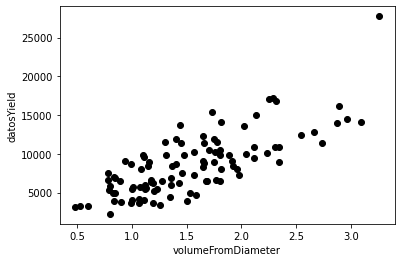

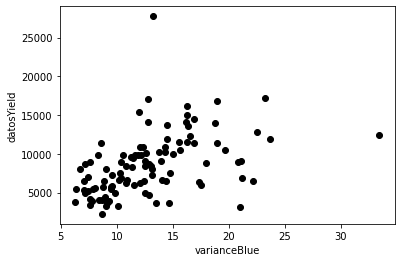

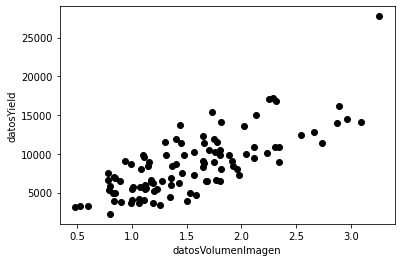

In [6]:
pyplot.scatter(volumeFromDiameter,datos.datosYeld,c="black")
pyplot.xlabel("volumeFromDiameter")
pyplot.ylabel("datosYield")

pyplot.show()

pyplot.scatter(dataframe["varianceBlue"],datos.datosYeld,c="black")
pyplot.xlabel("varianceBlue")
pyplot.ylabel("datosYield")

pyplot.show()

pyplot.scatter(datos.datosVolumenImagen,datos.datosYeld,c="black")
pyplot.xlabel("datosVolumenImagen")
pyplot.ylabel("datosYield")

pyplot.show()

<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


In [7]:
import pandas as pd
IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"areaLateral":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)
dframeFinal.corr(method="pearson")

,yields,ndvi,volumenImagen,volumenCalculado,areaCalculada,areaImagen,alturaImagen,alturaMedida,datosIafNdvi,meanRed,...,ndviMean,ndviMax,ndviMin,rviMean,nrviMean,tviMean,saviMean,areaLateral,IAF_VOL,IAF_AREA
yields,1.000000,0.101661,0.760897,0.754905,0.610232,0.632154,0.719736,0.730056,0.202594,0.205073,...,0.101661,0.594870,-0.300613,0.108473,0.101661,0.100966,0.102918,0.767902,0.760897,0.767902
ndvi,0.101661,1.000000,-0.238039,-0.159239,-0.082200,-0.172962,-0.284269,-0.079980,-0.072935,0.258659,...,1.000000,0.268375,0.363234,0.998785,1.000000,0.999979,0.999954,-0.246011,-0.238039,-0.246011
volumenImagen,0.760897,-0.238039,1.000000,0.948400,0.787971,0.925925,0.832837,0.709445,0.235857,0.149971,...,-0.238039,0.406683,-0.407018,-0.235486,-0.238039,-0.238267,-0.236259,0.993002,1.000000,0.993002
volumenCalculado,0.754905,-0.159239,0.948400,1.000000,0.827770,0.938198,0.715321,0.810952,0.155685,0.244302,...,-0.159239,0.410319,-0.303929,-0.162137,-0.159239,-0.158755,-0.156663,0.932618,0.948400,0.932618
areaCalculada,0.610232,-0.082200,0.787971,0.827770,1.000000,0.801173,0.581702,0.653904,0.179808,0.195956,...,-0.082200,0.318814,-0.276201,-0.081652,-0.082200,-0.082314,-0.080208,0.779929,0.787971,0.779929
areaImagen,0.632154,-0.172962,0.925925,0.938198,0.801173,1.000000,0.582783,0.574280,0.082127,0.231001,...,-0.172962,0.343554,-0.223763,-0.175572,-0.172962,-0.172616,-0.170245,0.894771,0.925925,0.894771
alturaImagen,0.719736,-0.284269,0.832837,0.715321,0.581702,0.582783,1.000000,0.754090,0.402498,-0.005457,...,-0.284269,0.323579,-0.559630,-0.274855,-0.284269,-0.285262,-0.284235,0.882646,0.832837,0.882646
alturaMedida,0.730056,-0.079980,0.709445,0.810952,0.653904,0.574280,0.754090,1.000000,0.247509,0.196025,...,-0.079980,0.338718,-0.342368,-0.081775,-0.079980,-0.079520,-0.078324,0.739974,0.709445,0.739974
datosIafNdvi,0.202594,-0.072935,0.235857,0.155685,0.179808,0.082127,0.402498,0.247509,1.000000,-0.225125,...,-0.072935,-0.024792,-0.919003,-0.057017,-0.072935,-0.074907,-0.075789,0.269696,0.235857,0.269696
meanRed,0.205073,0.258659,0.149971,0.244302,0.195956,0.231001,-0.005457,0.196025,-0.225125,1.000000,...,0.258659,0.210205,0.230929,0.241073,0.258659,0.260858,0.267729,0.133755,0.149971,0.133755


<b style="color:red;">Area Lateral Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Area Lateral y Yield

In [8]:

popt, pcov = curve_fit(definirCorrelacionVariables.objective, areaLateral, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(areaLateral, *popt)
r2_score(datos.datosYeld, y_pred)

0.5896733666182976

<b style="color:red;">Volumen From Diametro Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen calculado desde el diametro y Yield

In [9]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, volumeFromDiameter, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(volumeFromDiameter, *popt)
r2_score(datos.datosYeld, y_pred)

0.5789647145546297

<b style="color:red;">Volumen Calculado Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen calculado desde el diametro y Yield

In [10]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, datos.datosVolumenCalculado, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(datos.datosVolumenCalculado, *popt)
r2_score(datos.datosYeld, y_pred)

0.5698811743702776

<b style="color:red;">Volumen Imagen Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen Imagen y Yield

In [11]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, datos.datosVolumenImagen, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(datos.datosVolumenImagen, *popt)
r2_score(datos.datosYeld, y_pred)

0.5789647145546296

LINEAR REGRESSION

0.5952213050976274
4820.442954617275 1157.2142727811083


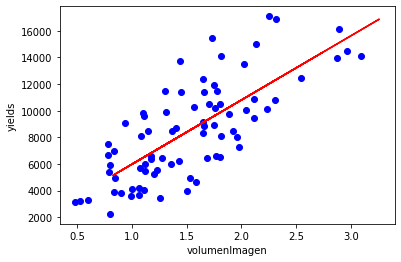

In [12]:
msk = np.random.rand(len(dframeFinal)) < 0.8
train = dframeFinal[msk]
test = dframeFinal[~msk]
popt, pcov = curve_fit(definirCorrelacionVariables.objective, train["volumenImagen"], train["yields"])
y_pred = definirCorrelacionVariables.objective(test["volumenImagen"], *popt)
pyplot.plot(test["volumenImagen"], y_pred, color = 'red')
print(r2_score(test["yields"], y_pred))
print(*popt)

pyplot.scatter(train["volumenImagen"], train["yields"],  color='blue')
pyplot.xlabel("volumenImagen")
pyplot.ylabel("yields")
pyplot.show()

CROSS VALIDATION

SVR

C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5333744463797134


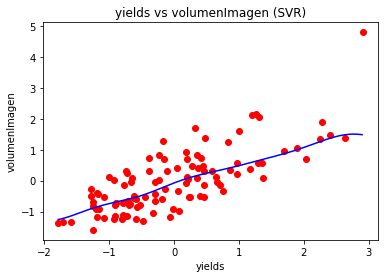

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(dataframe.volumenImagen.values.reshape(-1, 1))
y = sc_y.fit_transform(dataframe.yields.values.reshape(-1, 1))

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

print(regressor.score(X,y))

X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
pyplot.scatter(X, y, color = 'red')
pyplot.plot(X_grid, regressor.predict(X_grid), color = 'blue')
pyplot.title('yields vs volumenImagen (SVR)')
pyplot.xlabel('yields')
pyplot.ylabel('volumenImagen')
pyplot.show()

Multiple Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
dfsX=dframeFinal.loc[:,["volumenImagen","ndviMax","areaLateral"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

X_train, X_test, y_train, y_test= train_test_split(X_multiple,y_multiple,test_size=0.2)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train,y_train)

Y_pred_test=lr_multiple.predict(X_test)
print(r2_score(y_test,Y_pred_test))
print(lr_multiple.score(X_test,y_test))

print(lr_multiple.coef_)
print(lr_multiple.intercept_)




0.5110072879096729
0.5110072879096729
[-3180.60076742 56856.85441994  3497.83238054]
-39862.502887412695


<b style="color:red;">SVR</b>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
dfsX=dframeFinal.loc[:,["volumenImagen","ndviMax","areaLateral"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)



print(regressor.score(X_test,y_test))

0.42230172534807275


C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<b style="color:red;">LINEAR REGRESSION SIMPLE VS MULTIPLE</b>

USO DE CROSS VAL SCORE

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
dfs=dframeFinal.loc[:,["yields","volumenImagen"]]
scores = cross_val_score(lm,dfs.volumenImagen.values.reshape(-1, 1) ,dfs.yields.values , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


lm = LinearRegression()

dfsX=dframeFinal.loc[:,["volumenImagen","ndviMax","areaLateral"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

scores = cross_val_score(lm,X_multiple ,y_multiple , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


[0.68226567 0.58475797 0.30322008 0.54257341]
0.5282042842263209
[0.70141794 0.68466037 0.45103712 0.73721669]
0.6435830312318747


<b style="color:red;">MULTI SVR REGRESSION</b>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR

dfsX=dframeFinal.loc[:,["volumenImagen","ndviMax","areaLateral"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


regressor = SVR(kernel = 'linear')

scores = cross_val_score(regressor,X ,y , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ut

[0.71885843 0.66399042 0.37979726 0.7268663 ]
0.6223781044182708


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regr = RandomForestRegressor()

dfs=dframeFinal.loc[:,["yields","volumenImagen"]]
scores = cross_val_score(regr,dfs.volumenImagen.values.reshape(-1, 1) ,dfs.yields.values , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


regr = RandomForestRegressor()


dfsX=dframeFinal.loc[:,["volumenImagen","ndviMax","areaLateral"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

scores = cross_val_score(regr,X_multiple ,y_multiple , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))

[0.36275258 0.3824471  0.20084689 0.34882875]
0.323718830642703
[0.64149657 0.49257818 0.29428166 0.47312839]
0.47537120153529466


In [19]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeRegressor()


dfs=dframeFinal.loc[:,["yields","volumenImagen"]]
scores = cross_val_score(clf,dfs.volumenImagen.values.reshape(-1, 1) ,dfs.yields.values , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


clf = tree.DecisionTreeRegressor()

dfsX=dframeFinal.loc[:,["volumenImagen","ndviMax","areaLateral"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

scores = cross_val_score(clf,X_multiple ,y_multiple , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))

[-0.12251571  0.23473005  0.0199207   0.20830922]
0.08511106468770693
[0.55571785 0.15039902 0.11733455 0.32701716]
0.2876171427551569
